In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import csv

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
inputX = tf.placeholder('float', [None, 784])

weight_e = tf.Variable(tf.random_normal([784, 256]), name="weight_e")
bias_e = tf.Variable(tf.random_normal([256]), name="bias_e")

encoder = tf.nn.sigmoid(tf.add(tf.matmul(inputX, weight_e), bias_e))

weight_d = tf.Variable(tf.random_normal([256, 784]), name="weight_d")
bias_d = tf.Variable(tf.random_normal([784]), name="bias_d")

decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, weight_d), bias_d))

In [5]:
cost = tf.reduce_mean(tf.pow(inputX - decoder, 2))
optimiser = tf.train.RMSPropOptimizer(0.01).minimize(cost)

In [6]:
saver = tf.train.Saver()

In [7]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(2):
        total_batch = int(mnist.train.num_examples/256)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(256)
            _, c = sess.run([optimiser, cost], feed_dict={inputX:batch_xs})
            
        print('Epoch number :'+str(epoch),
              'cost is :'+ str(c))
    
    save_path = saver.save(sess, "/tmp/model.ckpt")
    print("Model saved in file: %s" % save_path)

Epoch number :0 cost is :0.128123
Epoch number :1 cost is :0.0781876
Model saved in file: /tmp/model.ckpt


In [8]:
%matplotlib inline

INFO:tensorflow:Restoring parameters from /tmp/model.ckpt


INFO:tensorflow:Restoring parameters from /tmp/model.ckpt


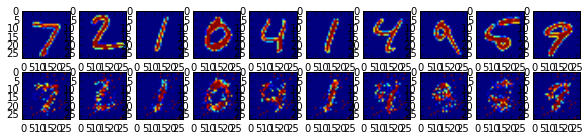

In [9]:
with tf.Session() as def_session:
    def_session.run(tf.global_variables_initializer())
    saver.restore(def_session, "/tmp/model.ckpt")
    encode_decode = def_session.run(decoder, feed_dict={inputX:mnist.test.images[:10]})

f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(10):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))

In [50]:
with open('Supervised_data.csv') as csvfile:
    csv_data = list(csv.DictReader(csvfile))
    
supervised_data = []
for data in csv_data:
    element = []
    element.append(data['NODE_ID'])
    element.append(float(data['RATING']))

    supervised_data.append(element)

In [51]:
nodes = [row[0] for row in supervised_data]

In [52]:
def get_selected_input_data(location, nodes):
    with open(location) as csvfile:
        csv_data = list(csv.DictReader(csvfile))

    keyList = csv_data[0].keys()

    for element in keyList:
        if element == 'DOMAIN' or element == 'NODE_ID':
            continue
        values = set(float(data[element]) for data in csv_data)
        maximum = max(values)
        minimum = min(values)
        for data in csv_data:
            data[element] = (float(data[element]) - minimum) / (maximum - minimum)

    input_data = []
    for data in csv_data:
        element = []
        if data['NODE_ID'] in nodes :
            element.append(data['NODE_ID'])
            for key in keyList:
                if key == 'DOMAIN' or key == 'NODE_ID':
                    continue
                element.append(data[key])

            input_data.append(element)

    return input_data

In [53]:
input_data = get_selected_input_data('input_data.csv', nodes)

In [82]:
input_data.sort(key=lambda x: x[0])
supervised_data.sort(key=lambda x: x[0])

In [81]:
supervised_input = [row[1:] for row in input_data]
supervised_labels = [row[1:] for row in supervised_data]